In [272]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import os
import pickle
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [273]:
data = pd.read_csv('mfcc13_df.csv', index_col=False) #if needed change to mfcc22_df.csv
labels = data.iloc[:,[-1]]

data = data.drop(labels.columns,axis = 1) # dropping labels column
data.describe()

0            1  ...           11           12
count  4720.000000  4720.000000  ...  4720.000000  4720.000000
mean   -462.617816    61.536074  ...     0.551877    -4.249241
std     119.858131    26.597890  ...     6.379453     4.663620
min    -848.919070    -5.006873  ...   -16.693745   -22.271100
25%    -538.269513    42.500910  ...    -4.346815    -6.977400
50%    -435.310965    59.710182  ...    -0.196650    -3.930869
75%    -378.401825    77.381369  ...     4.933820    -1.214083
max    -196.677430   163.169360  ...    20.122078    18.313444

[8 rows x 13 columns]

##Check if data is balanced


In [274]:
labels.value_counts()

13
0     1440
1      520
8      460
7      460
6      460
5      460
4      460
3      460
dtype: int64

In [275]:
data.isnull().sum()
data

0          1          2  ...         10         11         12
0    -697.98420  55.228490   0.323863  ...   0.496104  -2.722926   1.645800
1    -693.06970  55.734570  -1.919739  ...   0.494107  -2.296898   0.678700
2    -691.77014  58.350647  -0.165160  ...   0.264550  -2.529107   1.548612
3    -685.23790  56.236690   2.453112  ...   0.895644  -1.203600   0.246569
4    -727.31793  62.764400   2.751275  ...   0.639894  -2.745656   0.198219
...         ...        ...        ...  ...        ...        ...        ...
4715 -337.71085  24.577623  -1.306136  ... -13.726978   4.282166  -2.576891
4716 -341.39117  18.674833  -8.744924  ...  -9.159187  11.992616 -14.414687
4717 -410.27084  62.054535   7.847240  ... -16.641613   9.453328  -5.310473
4718 -368.92780  38.372585  -4.199680  ...  -9.456623   8.430493  -6.322295
4719 -409.73386  54.063007  31.930258  ...  -4.250960   2.096650  -7.660268

[4720 rows x 13 columns]

In [276]:
data.isna().sum()
data.loc[0][:]

0    -697.984200
1      55.228490
2       0.323863
3      12.775377
4       7.396148
5       0.866224
6      -3.550276
7      -2.828331
8     -11.305533
9      -2.524927
10      0.496104
11     -2.722926
12      1.645800
Name: 0, dtype: float64

##Outliers


In [277]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(data.any() < (Q1 - 1.5*IQR)) and (data.any() > (Q3 + 1.5*IQR))
#from scipy import stats
#data=data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]


0     159.867687
1      34.880459
2      24.514361
3      19.966477
4      14.492903
5      10.108586
6       9.175622
7      10.798735
8       9.615879
9       6.665491
10      9.287414
11      9.280635
12      5.763317
dtype: float64
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
dtype: bool


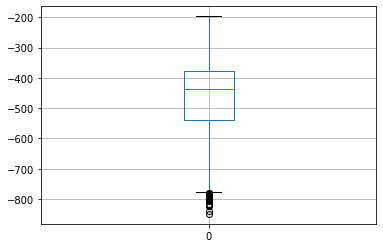

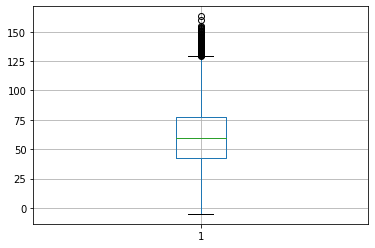

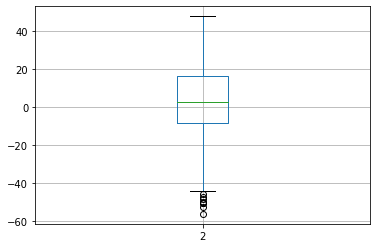

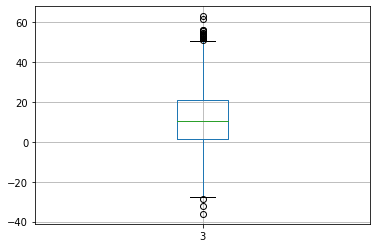

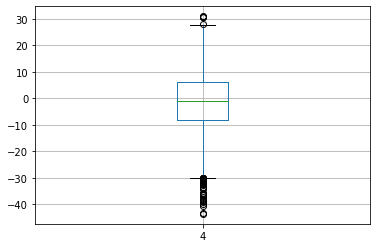

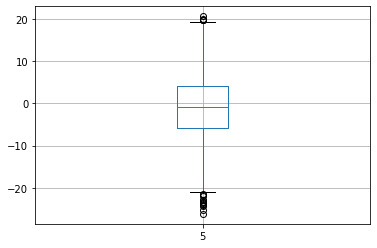

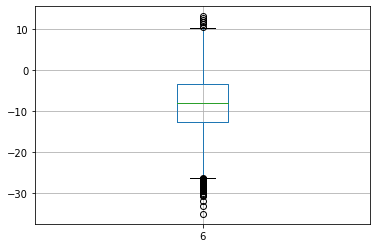

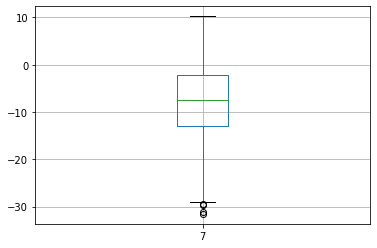

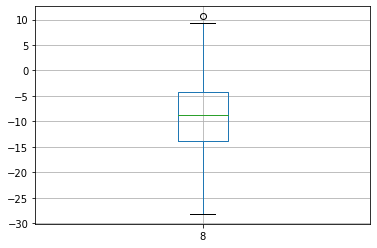

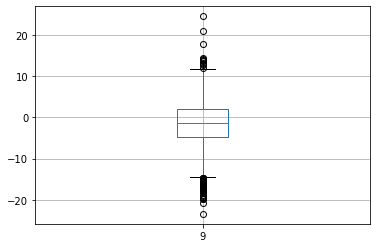

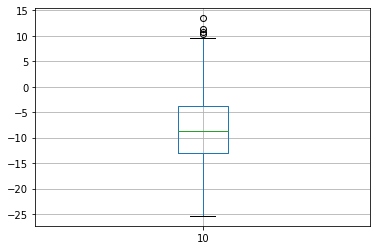

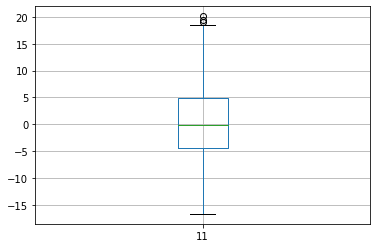

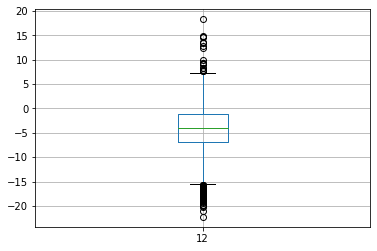

In [278]:
for column in data:
    plt.figure()
    data.boxplot([column])

##Standarization

In [279]:
data +=848.919070 #adding abs min value to whole data just to elimiate negative values
x = data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)

In [280]:
data

0         1         2   ...        10        11        12
0     0.231409  0.358168  0.544527  ...  0.666064  0.379479  0.589311
1     0.238944  0.361177  0.522965  ...  0.666013  0.391051  0.565481
2     0.240937  0.376733  0.539828  ...  0.660103  0.384743  0.586916
3     0.250952  0.364163  0.564990  ...  0.676350  0.420747  0.554834
4     0.186436  0.402978  0.567856  ...  0.669766  0.378861  0.553642
...        ...       ...       ...  ...       ...       ...       ...
4715  0.783771  0.175914  0.528862  ...  0.299905  0.569753  0.485264
4716  0.778129  0.140815  0.457373  ...  0.417498  0.779186  0.193581
4717  0.672524  0.398757  0.616830  ...  0.224870  0.710213  0.417909
4718  0.735910  0.257940  0.501054  ...  0.409841  0.682430  0.392977
4719  0.673347  0.351238  0.848278  ...  0.543856  0.510389  0.360010

[4720 rows x 13 columns]

##Splitting data


In [281]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=50)

print("Number of training samples:", X_train.shape[0])

print("Number of testing samples:", X_test.shape[0])

print("Number of features:", X_train.shape[1])


Number of training samples: 3304
Number of testing samples: 1416
Number of features: 13


##Undersampling data or Oversampling - to choose

In [282]:
rus = RandomUnderSampler(random_state=0)
#rus = RandomOverSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
X_resampled.shape, y_resampled.shape

((2464, 13), (2464, 1))

In [283]:
y_resampled.value_counts()

13
8     308
7     308
6     308
5     308
4     308
3     308
1     308
0     308
dtype: int64

## PCA 

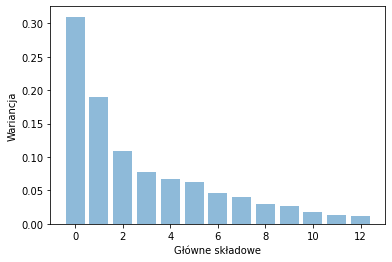

In [284]:
pca = PCA()
X_train_new = pca.fit_transform(X_resampled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.bar(np.arange(0,len(explained_variance)), explained_variance, alpha=0.5, align='center')
plt.ylabel('Wariancja')
plt.xlabel('Główne składowe')
plt.show()

#PCA worsen the accuracy, uncomment to use it

# pca1 = PCA(n_components=10) 
# X_resampled = pca1.fit_transform(X_resampled)
# print(X_resampled.shape)

# pca1 = PCA(n_components=10) 
# X_test = pca1.fit_transform(X_test)
# print(X_test.shape)

## Grid Search - finding best combination of hyperparameters

In [285]:
# Uncoment to use grid search to find best hyperparameters - already found ->model_params

# model = MLPClassifier()

# parameter_space = {
#     'hidden_layer_sizes': [(200,),(300,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.01, 0.1],
#     'learning_rate': ['constant','adaptive'],
#     'max_iter': [200, 500],
#     'batch_size': [100, 254]
    
# }

# clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5)
# clf.fit(X_train, y_train) 


In [286]:
#print('Best parameters found:\n', clf.best_params_)

In [287]:
# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [288]:
model_params = {
    'activation': 'relu',
    'alpha': 0.01,
    'batch_size': 254,
    'hidden_layer_sizes': (300,),
    'learning_rate': 'adaptive',
    'max_iter': 200,
    'solver': 'adam'
}

model = MLPClassifier(**model_params)
model.fit(X_resampled, y_resampled)

y_true, y_pred = y_test, model.predict(X_test)

accuracy = accuracy_score(y_true, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 86.86%


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [289]:
print(model.n_layers_)
print(model.n_iter_)
print(model.loss_)

3
200
0.45219087063697727


In [290]:
print('Results on the test set:')
print(classification_report(y_true, y_pred))
confusion_matrix(y_true, y_pred)

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       413
           1       0.86      0.81      0.83       160
           3       0.73      0.77      0.75       146
           4       0.80      0.91      0.85       122
           5       0.88      0.82      0.85       152
           6       0.80      0.85      0.82       132
           7       0.83      0.86      0.84       151
           8       0.81      0.71      0.76       140

    accuracy                           0.87      1416
   macro avg       0.84      0.84      0.84      1416
weighted avg       0.87      0.87      0.87      1416



array([[410,   0,   1,   0,   1,   0,   0,   1],
       [  0, 129,   0,  21,   0,   1,   9,   0],
       [  1,   0, 113,   0,   8,   7,   4,  13],
       [  0,   6,   0, 111,   0,   0,   5,   0],
       [  0,   4,   9,   0, 125,   8,   2,   4],
       [  0,   1,   9,   0,   2, 112,   2,   6],
       [  0,  10,   3,   6,   0,   2, 130,   0],
       [  0,   0,  19,   0,   6,  10,   5, 100]])

## Saving model

In [291]:
if not os.path.isdir("result"):
    os.mkdir("result")

pickle.dump(clf, open("result/new_mlp.model", "wb"))
